In [62]:
import pandas as pd

# Load the data from the Excel file
file_path = 'D:/from_689/adachi_concat.xlsx'
data = pd.read_excel(file_path)

# Display a summary of the data
data.info(), data.head()

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11792 entries, 0 to 11791
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   age                      11792 non-null  float64       
 1   height                   11792 non-null  float64       
 2   weight                   11792 non-null  float64       
 3   last_weight              11792 non-null  float64       
 4   analgesia                11792 non-null  int64         
 5   fertility                11792 non-null  object        
 6   mode                     11792 non-null  object        
 7   cs_reason                11792 non-null  object        
 8   e_cs                     11792 non-null  int64         
 9   thyroid                  11792 non-null  int64         
 10  pmh                      11792 non-null  object        
 11  genital_cut              11792 non-null  int64         
 12  genital_tear             11792 n

(None,
     age  height  weight  last_weight  analgesia fertility  mode cs_reason  \
 0  37.0   154.0    50.0         59.4          0       AIH  経腟分娩        せず   
 1  35.0   160.0    47.0         58.1          0         0  経腟分娩        せず   
 2  25.0   158.0    47.0         60.0          0         0  経腟分娩        せず   
 3  38.0   156.0    46.0         53.5          0       その他  経腟分娩        せず   
 4  32.0   153.0    41.0         48.1          0         0  経腟分娩        せず   
 
    e_cs  thyroid  ...   norm_procedure  procedure_oxytocin  \
 0     0        0  ...               なし                   0   
 1     0        0  ...         div アトニン                   1   
 2     0        0  ...         div アトニン                   1   
 3     0        0  ...  div クリステレル アトニン                   1   
 4     0        0  ...               なし                   0   
 
    procedure_kristeller  procedure_memm  procedure_O2  procedure_minimetro  \
 0                     0               0             0          

In [63]:
data['bmi'] = 10000*(data['weight'])/(data['height']*data['height'])
data['c/s'] = 1*(data['mode_section'])

In [65]:
import tableone

# Define the columns to be included in the Table One
columns = ['age', 'height', 'weight', 'bmi', 'last_weight', 'weeks', 'days', 'G', 'P', 'fertility_AIH', 'fertility_ART', 'c/s',
           'pmh_gast', 'pmh_ortho', 'pmh_ent', 'pmh_brain', 'pmh_endo', 'pmh_opt', 'pmh_psych', 'pmh_resp', 'pmh_uro', 'pmh_infect', 'pmh_obgyn', 'pmh_allergy', 'pmh_cor', 'pmh_dent', 
           'procedure_oxytocin', 'procedure_kristeller', 'procedure_memm', 'procedure_O2', 'procedure_minimetro', 'procedure_transfusion', 'procedure_baloon', 'procedure_pgf2'
]

# Define categorical variables
categorical = ['G', 'P', 'fertility_AIH', 'fertility_ART', 'c/s',
              'pmh_gast', 'pmh_ortho', 'pmh_ent', 'pmh_brain', 'pmh_endo', 'pmh_opt', 'pmh_psych', 'pmh_resp', 'pmh_uro', 'pmh_infect', 'pmh_obgyn', 'pmh_allergy', 'pmh_cor', 'pmh_dent',
            'procedure_oxytocin', 'procedure_kristeller', 'procedure_memm', 'procedure_O2', 'procedure_minimetro', 'procedure_transfusion', 'procedure_baloon', 'procedure_pgf2'
              ]

# Define non-normal variables (using non-parametric tests for these)
nonnormal = ['age', 'height', 'weight', 'bmi', 'last_weight', 'weeks', 'days']

# Create Table One for the "前期" data, splitting by 'analgesia'
tableone = tableone.TableOne(data=data, columns=columns, categorical=categorical, groupby='analgesia', nonnormal=nonnormal, pval=True, htest_name=True)

tableone

tableone.to_excel('ondemand_lea_table1.xlsx')


C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function mean at 0x00000208277B8720> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function median at 0x000002082790B9C0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To kee

In [66]:
# Convert date columns to datetime format if not already done
data['labor_date'] = pd.to_datetime(data['labor_date'], errors='coerce')

data_on_demand = data[data['labor_date'] >= '2018-08-01']

indications = ['既往筋腫核出、骨盤位', '既往帝切、胎児機能不全', '両股関節唇損傷手術既往', '既往帝切、前期破水', '双胎', 
               '常位胎盤早期剥離疑い', '既往子宮筋腫手術', '母体合併症（脳動脈瘤）', '子宮角部妊娠術後のため', 
               'HDP、低置胎盤、高齢', '子宮内胎児発育遅延', 'PIH、胎児胎盤機能不全、骨盤位', '低置胎盤、軟産道強靭', 
               '骨盤位、HDP', '胎児機能不全（FGR）', 'IUGR', 'FGR', '子宮筋腫合併', '胎盤早期剥離の疑い', '既往帝王切開', 
               '胎盤早期剥離', '子宮筋腫合併妊娠', '産道感染（外陰部ヘルペス）', '既往筋腫核出、既往帝王切開', '既往帝切、PIH', 
               '骨盤位、前期破水、陣痛発来', 'PIH／低位胎盤', 'ミオーム合併', '既往帝切、骨盤位', '臍帯辺縁付着、高齢初産', 
               'コンジローマ', 'ヘルペス治療後', '外陰ヘルペス', '既往子宮手術', '低位胎盤', '子宮頸部筋腫合併', 
               '既往帝切、陣痛発来', '前置', '低置胎盤', '早剥疑い', '骨盤位', '骨盤位.腹痛.出血', '胎位', 
               '前回分娩時Ⅳ度裂傷にて', 'ラパロ手術歴あり', '既往帝切、HDP ', '早期胎盤剥離疑い', '前置胎盤', 
               '前回早剥、本人希望', '既往帝切、BEL', '既往帝切、PIH', '子宮内膜症ope後', '既往筋腫核出、低置胎盤', 
               '骨盤位、子宮筋腫合併', '常位胎盤早期剥離', 'ミオメク後', 'PIH、羊水過症、FGR', '既往筋腫核出', '既往帝切、陣発', 
               '既往帝切', 'BEL', '筋腫核出術後', '骨盤位、FGR', '横位', '低地胎盤', '外陰部ヘルペス', 'コンジローマ感染', 
               '子宮筋腫術後', '既往帝切、切迫早産', '足位', '重複子宮', '希望']

data_on_demand = data_on_demand[~data_on_demand['cs_reason'].isin(indications)]
len(data_on_demand)

5008

In [67]:
import tableone

# Define the columns to be included in the Table One
columns = ['age', 'height', 'weight', 'bmi', 'last_weight', 'weeks', 'days', 'G', 'P', 'fertility_AIH', 'fertility_ART', 'c/s', 
           'genital_cut', 'genital_tear', 'ph', 'apgar1', 'apgar5', 'baby_girth', 'baby_weight', 
           'pmh_gast', 'pmh_ortho', 'pmh_ent', 'pmh_brain', 'pmh_endo', 'pmh_opt', 'pmh_psych', 'pmh_resp', 'pmh_uro', 'pmh_infect', 'pmh_obgyn', 'pmh_allergy', 'pmh_cor', 'pmh_dent',
            'procedure_oxytocin', 'procedure_kristeller', 'procedure_memm', 'procedure_O2', 'procedure_minimetro', 'procedure_transfusion', 'procedure_baloon', 'procedure_pgf2'
           
           ]

# Define categorical variables
categorical = ['G', 'P', 'genital_cut', 'genital_tear', 'fertility_AIH', 'fertility_ART', 'c/s',
              'pmh_gast', 'pmh_ortho', 'pmh_ent', 'pmh_brain', 'pmh_endo', 'pmh_opt', 'pmh_psych', 'pmh_resp', 'pmh_uro', 'pmh_infect', 'pmh_obgyn', 'pmh_allergy', 'pmh_cor', 'pmh_dent',
            'procedure_oxytocin', 'procedure_kristeller', 'procedure_memm', 'procedure_O2', 'procedure_minimetro', 'procedure_transfusion', 'procedure_baloon', 'procedure_pgf2'
            ]

# Define non-normal variables (using non-parametric tests for these)
nonnormal = ['age', 'height', 'weight', 'bmi', 'last_weight', 'weeks', 'days', 'ph', 'apgar1', 'apgar5']

# Create Table One for the "前期" data, splitting by 'analgesia'
tableone_on_demand = tableone.TableOne(data=data_on_demand, columns=columns, categorical=categorical, groupby='analgesia', nonnormal=nonnormal, pval=True, htest_name=True)

tableone_on_demand

tableone_on_demand.to_excel('ondemand_lea_table2.xlsx')

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function mean at 0x00000208277B8720> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function median at 0x000002082790B9C0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To kee

# Convert date columns to datetime format if not already done
data['labor_date'] = pd.to_datetime(data['labor_date'], errors='coerce')

# Define the date range
start_date = '2018-08-01'
end_date = '2018-10-31'

# Filter the data for the given date range
filtered_data = data[(data['labor_date'] >= start_date) & (data['labor_date'] <= end_date)]

# Check the result
filtered_data.info(), filtered_data.head()


import scipy.stats as stats

# Create a contingency table for 'analgesia' and 'c/s'
contingency_table = pd.crosstab(filtered_data['analgesia'], filtered_data['c/s'])

# Perform the Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

contingency_table, chi2, p, expected

# Define the new date range for 2021
start_date_2021 = '2021-08-01'
end_date_2021 = '2021-10-31'

# Filter the data for the new date range
filtered_data_2021 = data[(data['labor_date'] >= start_date_2021) & (data['labor_date'] <= end_date_2021)]

# Create a contingency table for 'analgesia' and 'e_cs' for 2021 data
contingency_table_2021 = pd.crosstab(filtered_data_2021['analgesia'], filtered_data_2021['c/s'])

# Perform the Chi-squared test on 2021 data
chi2_2021, p_2021, dof_2021, expected_2021 = stats.chi2_contingency(contingency_table_2021)

contingency_table_2021, chi2_2021, p_2021, expected_2021

import tableone

# Define the columns to be included in the Table One
columns = ['age', 'height', 'weight', 'last_weight', 'thyroid', 'weeks', 'days', 'G', 'P', 'apgar1', 'apgar5', 'ph', 'c/s']

# Define categorical variables
categorical = ['thyroid', 'G', 'P', 'c/s']

# Define non-normal variables (using non-parametric tests for these)
nonnormal = ['age', 'height', 'weight', 'last_weight', 'weeks', 'days', 'apgar1', 'apgar5', 'ph']

# Create Table One for the "前期" data, splitting by 'analgesia'
tableone_pre = tableone.TableOne(data=filtered_data, columns=columns, categorical=categorical, groupby='analgesia', nonnormal=nonnormal, pval=True, htest_name=True)

tableone_pre


# ↑前期データ

import tableone

# Define the columns to be included in the Table One
columns = ['age', 'height', 'weight', 'last_weight', 'thyroid', 'weeks', 'days', 'G', 'P', 'apgar1', 'apgar5', 'ph', 'c/s']

# Define categorical variables
categorical = ['thyroid', 'G', 'P', 'c/s']

# Define non-normal variables (using non-parametric tests for these)
nonnormal = ['age', 'height', 'weight', 'last_weight', 'weeks', 'days', 'apgar1', 'apgar5', 'ph']

# Create Table One for the "前期" data, splitting by 'analgesia'
tableone_pre = tableone.TableOne(data=filtered_data_2021, columns=columns, categorical=categorical, groupby='analgesia', nonnormal=nonnormal, pval=True, htest_name=True)

tableone_pre


# ↑後期データ

import pandas as pd
from tableone import TableOne

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期と後期の期間を定義
pre_period = (data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31')
post_period = (data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31')

# 前期と後期のデータを抽出
pre_data = data[pre_period]
post_data = data[post_period]

# 全体のデータに期間ラベルを追加
data['period'] = ['cradle' if pre else 'mature' if post else None for pre, post in zip(pre_period, post_period)]

# TableOneの生成
columns = ['age', 'height', 'weight', 'last_weight', 'thyroid', 'weeks', 'days', 'G', 'P', 'apgar1', 'apgar5', 'ph']
categorical = ['thyroid', 'G', 'P']
nonnormal = ['age', 'height', 'weight', 'last_weight', 'weeks', 'days', 'apgar1', 'apgar5', 'ph']

# 前期と後期でTableOneを生成
table_one = TableOne(data, columns=columns, categorical=categorical, groupby='period', nonnormal=nonnormal, pval=True, htest_name=True)

# TableOneの表示
table_one

# ↑前期と後期データ

import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期と後期のデータフラグを設定
data['period'] = np.where((data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31'), '前期', 
                          np.where((data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31'), '後期', None))

# 前期と後期のデータのみを選択
filtered_data = data[data['period'].notnull()]

# 必要な変数の選択と前処理
# 例：'age', 'height', 'weight', 'weeks'など
formula = 'analgesia ~ age + height + weight + weeks + period'

# ロジスティック回帰モデルを使って傾向スコアを計算
model = logit(formula, data=filtered_data).fit()
filtered_data['propensity_score'] = model.predict()

# 傾向スコアの分布をプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data[filtered_data['analgesia'] == 0]['propensity_score'], color='blue', shade=True, label='Analgesia = 0')
sns.kdeplot(filtered_data[filtered_data['analgesia'] == 1]['propensity_score'], color='red', shade=True, label='Analgesia = 1')
plt.title('kde_of_PS')
plt.xlabel('Propensity_score')
plt.ylabel('Density')
plt.legend()
plt.show()


# ↑2つの期間における傾向スコア分析

import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期のデータフラグを設定
data['period'] = np.where((data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31'), '前期', None)

# 前期のデータのみを選択
filtered_data = data[data['period'] == '前期']

# 必要な変数の選択と前処理
# 例：'age', 'height', 'weight', 'weeks'など
formula = 'analgesia ~ age + height + weight + weeks'

# ロジスティック回帰モデルを使って傾向スコアを計算
model = logit(formula, data=filtered_data).fit()
filtered_data['propensity_score'] = model.predict()

# 傾向スコアの分布をプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data[filtered_data['analgesia'] == 0]['propensity_score'], color='blue', shade=True, label='Analgesia = 0')
sns.kdeplot(filtered_data[filtered_data['analgesia'] == 1]['propensity_score'], color='red', shade=True, label='Analgesia = 1')
plt.title('傾向スコアの分布 - 前期')
plt.xlabel('傾向スコア')
plt.ylabel('密度')
plt.legend()
plt.show()


# ↑前期のみ

import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 後期のデータフラグを設定
data['period'] = np.where((data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31'), '後期', None)

# 後期のデータのみを選択
filtered_data = data[data['period'] == '後期']

# 必要な変数の選択と前処理
# 例：'age', 'height', 'weight', 'weeks'など
formula = 'analgesia ~ age + height + weight + weeks'

# ロジスティック回帰モデルを使って傾向スコアを計算
model = logit(formula, data=filtered_data).fit()
filtered_data['propensity_score'] = model.predict()

# 傾向スコアの分布をプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data[filtered_data['analgesia'] == 0]['propensity_score'], color='blue', shade=True, label='Analgesia = 0')
sns.kdeplot(filtered_data[filtered_data['analgesia'] == 1]['propensity_score'], color='red', shade=True, label='Analgesia = 1')
plt.title('傾向スコアの分布 - 後期')
plt.xlabel('傾向スコア')
plt.ylabel('密度')
plt.legend()
plt.show()


# ↑後期のみ

import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 傾向スコアモデルに含める変数を選択
# 例：'age', 'height', 'weight', 'weeks'などの臨床変数
# ここではシンプルなモデルを仮定していますが、適宜変数を調整してください。
formula = 'analgesia ~ age + height + weight + weeks'

# ロジスティック回帰モデルを使って傾向スコアを計算
model = logit(formula, data=data).fit()
data['propensity_score'] = model.predict()

# 傾向スコアの分布をプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['analgesia'] == 0]['propensity_score'], color='blue', shade=True, label='Analgesia = 0')
sns.kdeplot(data[data['analgesia'] == 1]['propensity_score'], color='red', shade=True, label='Analgesia = 1')
plt.title('kde_of_PS')
plt.xlabel('Propensity_score')
plt.ylabel('Density')
plt.legend()
plt.show()


# ↑全期間の傾向スコア

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期のデータのみを選択
pre_period_data = data[(data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31')]

# 必要な変数の選択と前処理
X = pre_period_data[['age', 'height', 'weight', 'weeks']]  # 説明変数
y = pre_period_data['analgesia']  # 目的変数

# ロジスティック回帰モデルを使って傾向スコアを計算
model = LogisticRegression()
model.fit(X, y)
pre_period_data['propensity_score'] = model.predict_proba(X)[:, 1]

# 傾向スコアに基づくマッチング
treated = pre_period_data[pre_period_data['analgesia'] == 1]
control = pre_period_data[pre_period_data['analgesia'] == 0]

# 最も近い傾向スコアを持つ対照群を見つける
distances = pairwise_distances(treated[['propensity_score']], control[['propensity_score']], metric='euclidean')
closest = np.argmin(distances, axis=1)

# マッチング前の傾向スコア分布のプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(treated['propensity_score'], color='red', shade=True, label='Treated (Before Matching)')
sns.kdeplot(control['propensity_score'], color='blue', shade=True, label='Control (Before Matching)')

# データフレームのインデックスをリセット
treated = treated.reset_index(drop=True)
control = control.reset_index(drop=True)

# 重複のないマッチを確保
unique_closest, indices = np.unique(closest, return_index=True)
matched_control = control.iloc[unique_closest]
matched_treated = treated.iloc[indices]

# マッチング後の傾向スコア分布のプロット
sns.kdeplot(matched_treated['propensity_score'], color='orange', shade=True, label='Treated (After Matching)')
sns.kdeplot(matched_control['propensity_score'], color='green', shade=True, label='Control (After Matching)')

plt.title('Propensity Score Distribution Before and After Matching')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


# ↑前期のマッチング前後

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 後期のデータのみを選択
post_period_data = data[(data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31')]

# 必要な変数の選択と前処理
X = post_period_data[['age', 'height', 'weight', 'weeks']]  # 説明変数
y = post_period_data['analgesia']  # 目的変数

# ロジスティック回帰モデルを使って傾向スコアを計算
model = LogisticRegression()
model.fit(X, y)
post_period_data['propensity_score'] = model.predict_proba(X)[:, 1]

# 傾向スコアに基づくマッチング
treated = post_period_data[post_period_data['analgesia'] == 1]
control = post_period_data[post_period_data['analgesia'] == 0]

# 最も近い傾向スコアを持つ対照群を見つける
distances = pairwise_distances(treated[['propensity_score']], control[['propensity_score']], metric='euclidean')
closest = np.argmin(distances, axis=1)

# マッチング前の傾向スコア分布のプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(treated['propensity_score'], color='red', shade=True, label='Treated (Before Matching)')
sns.kdeplot(control['propensity_score'], color='blue', shade=True, label='Control (Before Matching)')

# データフレームのインデックスをリセット
treated = treated.reset_index(drop=True)
control = control.reset_index(drop=True)

# 重複のないマッチを確保
unique_closest, indices = np.unique(closest, return_index=True)
matched_control = control.iloc[unique_closest]
matched_treated = treated.iloc[indices]

# マッチング後の傾向スコア分布のプロット
sns.kdeplot(matched_treated['propensity_score'], color='orange', shade=True, label='Treated (After Matching)')
sns.kdeplot(matched_control['propensity_score'], color='green', shade=True, label='Control (After Matching)')

plt.title('Propensity Score Distribution Before and After Matching - Post Period')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


# ↑後期のマッチング前後

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期と後期のデータをそれぞれ選択
pre_period_data = data[(data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31')]
post_period_data = data[(data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31')]

# 前期と後期データの結合
combined_data = pd.concat([pre_period_data, post_period_data])

# 必要な変数の選択と前処理
X = combined_data[['age', 'height', 'weight', 'weeks']]  # 説明変数
y = combined_data['analgesia']  # 目的変数

# ロジスティック回帰モデルを使って傾向スコアを計算
model = LogisticRegression()
model.fit(X, y)
combined_data['propensity_score'] = model.predict_proba(X)[:, 1]

# 傾向スコアに基づくマッチング
treated = combined_data[combined_data['analgesia'] == 1]
control = combined_data[combined_data['analgesia'] == 0]

# 最も近い傾向スコアを持つ対照群を見つける
distances = pairwise_distances(treated[['propensity_score']], control[['propensity_score']], metric='euclidean')
closest = np.argmin(distances, axis=1)

# マッチング前の傾向スコア分布のプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(treated['propensity_score'], color='red', shade=True, label='Treated (Before Matching)')
sns.kdeplot(control['propensity_score'], color='blue', shade=True, label='Control (Before Matching)')

# データフレームのインデックスをリセット
treated = treated.reset_index(drop=True)
control = control.reset_index(drop=True)

# 重複のないマッチを確保
unique_closest, indices = np.unique(closest, return_index=True)
matched_control = control.iloc[unique_closest]
matched_treated = treated.iloc[indices]

# マッチング後の傾向スコア分布のプロット
sns.kdeplot(matched_treated['propensity_score'], color='orange', shade=True, label='Treated (After Matching)')
sns.kdeplot(matched_control['propensity_score'], color='green', shade=True, label='Control (After Matching)')

plt.title('Propensity Score Distribution Before and After Matching - Combined Periods')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


# ↑前期と後期のマッチング前後

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期と後期のデータをそれぞれ選択
pre_period_data = data[(data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31')]
post_period_data = data[(data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31')]

# 前期と後期データの結合
combined_data = pd.concat([pre_period_data, post_period_data])

# 必要な変数の選択と前処理
X = combined_data[['age', 'height', 'weight', 'weeks']]  # 説明変数
y = combined_data['analgesia']  # 目的変数

# ロジスティック回帰モデルを使って傾向スコアを計算
model = LogisticRegression()
model.fit(X, y)
combined_data['propensity_score'] = model.predict_proba(X)[:, 1]

# 傾向スコアに基づくマッチング
treated = combined_data[combined_data['analgesia'] == 1]
control = combined_data[combined_data['analgesia'] == 0]

# 最も近い傾向スコアを持つ対照群を見つける
distances = pairwise_distances(treated[['propensity_score']], control[['propensity_score']], metric='euclidean')
closest = np.argmin(distances, axis=1)

# マッチング前の傾向スコア分布のプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(treated['propensity_score'], color='red', shade=True, alpha=0.1, label='Treated (Before Matching)')
sns.kdeplot(control['propensity_score'], color='blue', shade=True, alpha=0.1, label='Control (Before Matching)')

# データフレームのインデックスをリセット
treated = treated.reset_index(drop=True)
control = control.reset_index(drop=True)

# 重複のないマッチを確保
unique_closest, indices = np.unique(closest, return_index=True)
matched_control = control.iloc[unique_closest]
matched_treated = treated.iloc[indices]

# マッチング後の傾向スコア分布のプロット
sns.kdeplot(matched_treated['propensity_score'], color='red', shade=True, alpha=0.3, label='Treated (After Matching)')
sns.kdeplot(matched_control['propensity_score'], color='blue', shade=True, alpha=0.3, label='Control (After Matching)')

plt.title('Propensity Score Distribution Before and After Matching - Combined Periods')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [3]:
# ↑前期と後期のマッチング前後

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期のデータのみを選択
pre_period_data = data[(data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31')]

# 必要な変数の選択と前処理
X = pre_period_data[['age', 'height', 'weight', 'weeks']]  # 説明変数
y = pre_period_data['analgesia']  # 目的変数

# ロジスティック回帰モデルを使って傾向スコアを計算
model = LogisticRegression()
model.fit(X, y)
pre_period_data['propensity_score'] = model.predict_proba(X)[:, 1]

# 傾向スコアに基づくマッチング
treated = pre_period_data[pre_period_data['analgesia'] == 1]
control = pre_period_data[pre_period_data['analgesia'] == 0]

# 最も近い傾向スコアを持つ対照群を見つける
distances = pairwise_distances(treated[['propensity_score']], control[['propensity_score']], metric='euclidean')
closest = np.argmin(distances, axis=1)

# マッチング前の傾向スコア分布のプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(treated['propensity_score'], color='red', shade=True, alpha=0.1, label='Treated (Before Matching)')
sns.kdeplot(control['propensity_score'], color='blue', shade=True, alpha=0.1, label='Control (Before Matching)')

# データフレームのインデックスをリセット
treated = treated.reset_index(drop=True)
control = control.reset_index(drop=True)

# 重複のないマッチを確保
unique_closest, indices = np.unique(closest, return_index=True)
matched_control = control.iloc[unique_closest]
matched_treated = treated.iloc[indices]

# マッチング後の傾向スコア分布のプロット
sns.kdeplot(matched_treated['propensity_score'], color='red', shade=True, alpha=0.5, label='Treated (After Matching)')
sns.kdeplot(matched_control['propensity_score'], color='blue', shade=True, alpha=0.5, label='Control (After Matching)')

plt.title('Propensity Score Distribution Before and After Matching - Pre Period')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


# ↑前期に対するマッチング前後

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 後期のデータのみを選択
post_period_data = data[(data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31')]

# 必要な変数の選択と前処理
X = post_period_data[['age', 'height', 'weight', 'weeks']]  # 説明変数
y = post_period_data['analgesia']  # 目的変数

# ロジスティック回帰モデルを使って傾向スコアを計算
model = LogisticRegression()
model.fit(X, y)
post_period_data['propensity_score'] = model.predict_proba(X)[:, 1]

# 傾向スコアに基づくマッチング
treated = post_period_data[post_period_data['analgesia'] == 1]
control = post_period_data[post_period_data['analgesia'] == 0]

# 最も近い傾向スコアを持つ対照群を見つける
distances = pairwise_distances(treated[['propensity_score']], control[['propensity_score']], metric='euclidean')
closest = np.argmin(distances, axis=1)

# マッチング前の傾向スコア分布のプロット
plt.figure(figsize=(10, 6))
sns.kdeplot(treated['propensity_score'], color='red', shade=True, alpha=0.1, label='Treated (Before Matching)')
sns.kdeplot(control['propensity_score'], color='blue', shade=True, alpha=0.1, label='Control (Before Matching)')

# データフレームのインデックスをリセット
treated = treated.reset_index(drop=True)
control = control.reset_index(drop=True)

# 重複のないマッチを確保
unique_closest, indices = np.unique(closest, return_index=True)
matched_control = control.iloc[unique_closest]
matched_treated = treated.iloc[indices]

# マッチング後の傾向スコア分布のプロット
sns.kdeplot(matched_treated['propensity_score'], color='red', shade=True, alpha=0.5, label='Treated (After Matching)')
sns.kdeplot(matched_control['propensity_score'], color='blue', shade=True, alpha=0.5, label='Control (After Matching)')

plt.title('Propensity Score Distribution Before and After Matching - Post Period')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


# ↑後期に対するマッチング前後

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 後期のデータのみを選択
post_period_data = data[(data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31')]

# 必要な変数の選択と前処理
X = post_period_data[['age', 'height', 'weight', 'weeks']]  # 説明変数
y = post_period_data['analgesia']  # 目的変数

# ロジスティック回帰モデルを使って傾向スコアを計算
model = LogisticRegression()
model.fit(X, y)
post_period_data['propensity_score'] = model.predict_proba(X)[:, 1]

# 傾向スコアに基づくマッチング
treated = post_period_data[post_period_data['analgesia'] == 1]
control = post_period_data[post_period_data['analgesia'] == 0]

# 最も近い傾向スコアを持つ対照群を見つける
distances = pairwise_distances(treated[['propensity_score']], control[['propensity_score']], metric='euclidean')
closest = np.argmin(distances, axis=1)

# 重複のないマッチを確保
unique_closest, indices = np.unique(closest, return_index=True)
matched_control = control.iloc[unique_closest]
matched_treated = treated.iloc[indices]

# プロット開始
plt.figure(figsize=(10, 6))

# マッチング前は点線の輪郭のみ
sns.kdeplot(treated['propensity_score'], color='red', linestyle=':', linewidth=2, label='Treated (Before Matching)', shade=False)
sns.kdeplot(control['propensity_score'], color='blue', linestyle=':', linewidth=2, label='Control (Before Matching)', shade=False)

# マッチング後は実線の輪郭に透明度0.1の塗りつぶし
sns.kdeplot(matched_treated['propensity_score'], color='red', linestyle='-', linewidth=2, label='Treated (After Matching)', shade=True, alpha=0.1)
sns.kdeplot(matched_control['propensity_score'], color='blue', linestyle='-', linewidth=2, label='Control (After Matching)', shade=True, alpha=0.1)

plt.title('Propensity Score Distribution Before and After Matching - Post Period')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# ↑後期に対するマッチング

# 後期データにおいて、マッチング前のanalgesiaとe_csについてχ二乗分析を実施
contingency_table_post_before = pd.crosstab(post_period_data['analgesia'], post_period_data['e_cs'])
chi2_post_before, p_post_before, dof_post_before, expected_post_before = chi2_contingency(contingency_table_post_before)

# マッチング後の後期データにおいて、analgesiaとe_csについてχ二乗分析を実施
matched_post_data = post_period_data.iloc[np.unique(closest, return_index=True)[1]]  # マッチングされたデータ
contingency_table_post_after = pd.crosstab(matched_post_data['analgesia'], matched_post_data['e_cs'])
chi2_post_after, p_post_after, dof_post_after, expected_post_after = chi2_contingency(contingency_table_post_after)

# マッチング前後の結果をまとめて返す
chi2_results_post_before = {
    'chi2_statistic': chi2_post_before,
    'p_value': p_post_before,
    'degrees_of_freedom': dof_post_before,
    'expected_freq': expected_post_before
}

chi2_results_post_after = {
    'chi2_statistic': chi2_post_after,
    'p_value': p_post_after,
    'degrees_of_freedom': dof_post_after,
    'expected_freq': expected_post_after
}

chi2_results_post_before, chi2_results_post_after

# ↑後期データに対するχ二乗

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期データの選択と処理
pre_period_data = data[(data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31')]
X_pre = pre_period_data[['age', 'height', 'weight', 'weeks']]
y_pre = pre_period_data['analgesia']

# ロジスティック回帰モデルを用いた傾向スコア計算
model_pre = LogisticRegression()
model_pre.fit(X_pre, y_pre)
pre_period_data['propensity_score'] = model_pre.predict_proba(X_pre)[:, 1]

# マッチング
treated_pre = pre_period_data[pre_period_data['analgesia'] == 1]
control_pre = pre_period_data[pre_period_data['analgesia'] == 0]
distances_pre = pairwise_distances(treated_pre[['propensity_score']], control_pre[['propensity_score']], metric='euclidean')
closest_pre = np.argmin(distances_pre, axis=1)

# ユニークなマッチングを確保
unique_closest_pre, indices_pre = np.unique(closest_pre, return_index=True)
matched_treated_pre = treated_pre.iloc[indices_pre]
matched_control_pre = control_pre.iloc[unique_closest_pre]

# マッチング前後のχ二乗検定
contingency_table_pre_before = pd.crosstab(pre_period_data['analgesia'], pre_period_data['e_cs'])
chi2_pre_before, p_pre_before, dof_pre_before, expected_pre_before = chi2_contingency(contingency_table_pre_before)

matched_pre_data = pd.concat([matched_treated_pre, matched_control_pre])
contingency_table_pre_after = pd.crosstab(matched_pre_data['analgesia'], matched_pre_data['e_cs'])
chi2_pre_after, p_pre_after, dof_pre_after, expected_pre_after = chi2_contingency(contingency_table_pre_after)

# 結果表示
results_pre_before = {
    'chi2_statistic': chi2_pre_before,
    'p_value': p_pre_before,
    'degrees_of_freedom': dof_pre_before,
    'expected_freq': expected_pre_before
}
results_pre_after = {
    'chi2_statistic': chi2_pre_after,
    'p_value': p_pre_after,
    'degrees_of_freedom': dof_pre_after,
    'expected_freq': expected_pre_after
}

# 可視化
plt.figure(figsize=(10, 6))
sns.kdeplot(treated_pre['propensity_score'], color='red', linestyle=':', linewidth=2, label='Treated (Before Matching)', shade=False)
sns.kdeplot(control_pre['propensity_score'], color='blue', linestyle=':', linewidth=2, label='Control (Before Matching)', shade=False)
sns.kdeplot(matched_treated_pre['propensity_score'], color='red', linestyle='-', linewidth=2, label='Treated (After Matching)', shade=True, alpha=0.1)
sns.kdeplot(matched_control_pre['propensity_score'], color='blue', linestyle='-', linewidth=2, label='Control (After Matching)', shade=True, alpha=0.1)
plt.title('Propensity Score Distribution Before and After Matching - Pre Period')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

results_pre_before, results_pre_after


# ↑前期データに対する可視化と検定

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期データの選択と処理
pre_period_data = data[(data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31')]
X_pre = pre_period_data[['age', 'height', 'weight', 'weeks']]
y_pre = pre_period_data['analgesia']

# ロジスティック回帰モデルを用いた傾向スコア計算
model_pre = LogisticRegression()
model_pre.fit(X_pre, y_pre)
pre_period_data['propensity_score'] = model_pre.predict_proba(X_pre)[:, 1]

# マッチング
treated_pre = pre_period_data[pre_period_data['analgesia'] == 1]
control_pre = pre_period_data[pre_period_data['analgesia'] == 0]
distances_pre = pairwise_distances(treated_pre[['propensity_score']], control_pre[['propensity_score']], metric='euclidean')
closest_pre = np.argmin(distances_pre, axis=1)

# ユニークなマッチングを確保
unique_closest_pre, indices_pre = np.unique(closest_pre, return_index=True)
matched_treated_pre = treated_pre.iloc[indices_pre]
matched_control_pre = control_pre.iloc[unique_closest_pre]

# マッチング前後のχ二乗検定
contingency_table_pre_before = pd.crosstab(pre_period_data['analgesia'], pre_period_data['e_cs'])
chi2_pre_before, p_pre_before, dof_pre_before, expected_pre_before = chi2_contingency(contingency_table_pre_before)

matched_pre_data = pd.concat([matched_treated_pre, matched_control_pre])
contingency_table_pre_after = pd.crosstab(matched_pre_data['analgesia'], matched_pre_data['e_cs'])
chi2_pre_after, p_pre_after, dof_pre_after, expected_pre_after = chi2_contingency(contingency_table_pre_after)

# 結果表示
results_pre_before = {
    'chi2_statistic': chi2_pre_before,
    'p_value': p_pre_before,
    'degrees_of_freedom': dof_pre_before,
    'expected_freq': expected_pre_before
}
results_pre_after = {
    'chi2_statistic': chi2_pre_after,
    'p_value': p_pre_after,
    'degrees_of_freedom': dof_pre_after,
    'expected_freq': expected_pre_after
}

# 可視化
plt.figure(figsize=(10, 6))
sns.kdeplot(treated_pre['propensity_score'], color='red', linestyle=':', linewidth=2, label='Treated (Before Matching)', shade=False)
sns.kdeplot(control_pre['propensity_score'], color='blue', linestyle=':', linewidth=2, label='Control (Before Matching)', shade=False)
sns.kdeplot(matched_treated_pre['propensity_score'], color='red', linestyle='-', linewidth=2, label='Treated (After Matching)', shade=True, alpha=0.1)
sns.kdeplot(matched_control_pre['propensity_score'], color='blue', linestyle='-', linewidth=2, label='Control (After Matching)', shade=True, alpha=0.1)
plt.title('Propensity Score Distribution Before and After Matching - Pre Period')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

results_pre_before, results_pre_after


# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 前期と後期のデータを結合
combined_data = pd.concat([
    data[(data['labor_date'] >= '2018-08-01') & (data['labor_date'] <= '2018-10-31')],
    data[(data['labor_date'] >= '2021-08-01') & (data['labor_date'] <= '2021-10-31')]
])

# 傾向スコア計算用の変数選択
X_combined = combined_data[['age', 'height', 'weight', 'weeks']]
y_combined = combined_data['analgesia']

# ロジスティック回帰モデルを用いて傾向スコア計算
model_combined = LogisticRegression()
model_combined.fit(X_combined, y_combined)
combined_data['propensity_score'] = model_combined.predict_proba(X_combined)[:, 1]

# マッチング処理
treated_combined = combined_data[combined_data['analgesia'] == 1]
control_combined = combined_data[combined_data['analgesia'] == 0]
distances_combined = pairwise_distances(treated_combined[['propensity_score']], control_combined[['propensity_score']], metric='euclidean')
closest_combined = np.argmin(distances_combined, axis=1)

# 重複のないマッチを確保
unique_closest_combined, indices_combined = np.unique(closest_combined, return_index=True)
matched_control_combined = control_combined.iloc[unique_closest_combined]
matched_treated_combined = treated_combined.iloc[indices_combined]

# マッチング前のχ二乗検定
contingency_table_combined_before = pd.crosstab(combined_data['analgesia'], combined_data['e_cs'])
chi2_combined_before, p_combined_before, dof_combined_before, expected_combined_before = chi2_contingency(contingency_table_combined_before)

# マッチング後のχ二乗検定
matched_combined_data = pd.concat([matched_treated_combined, matched_control_combined])
contingency_table_combined_after = pd.crosstab(matched_combined_data['analgesia'], matched_combined_data['e_cs'])
chi2_combined_after, p_combined_after, dof_combined_after, expected_combined_after = chi2_contingency(contingency_table_combined_after)

results_combined_before = {
    'chi2_statistic': chi2_combined_before,
    'p_value': p_combined_before,
    'degrees_of_freedom': dof_combined_before,
    'expected_freq': expected_combined_before
}

results_combined_after = {
    'chi2_statistic': chi2_combined_after,
    'p_value': p_combined_after,
    'degrees_of_freedom': dof_combined_after,
    'expected_freq': expected_combined_after
}

# マッチング前後の傾向スコア分布を可視化
plt.figure(figsize=(10, 6))
sns.kdeplot(treated_combined['propensity_score'], color='red', linestyle=':', linewidth=2, label='Treated (Before Matching)', shade=False)
sns.kdeplot(control_combined['propensity_score'], color='blue', linestyle=':', linewidth=2, label='Control (Before Matching)', shade=False)
sns.kdeplot(matched_treated_combined['propensity_score'], color='red', linestyle='-', linewidth=2, label='Treated (After Matching)', shade=True, alpha=0.1)
sns.kdeplot(matched_control_combined['propensity_score'], color='blue', linestyle='-', linewidth=2, label='Control (After Matching)', shade=True, alpha=0.1)
plt.title('Propensity Score Distribution Before and After Matching - Combined Periods')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

results_combined_before, results_combined_after


# ↑前後両期間に対する可視化と検定

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bougt\AppData\Local\Temp\ipykernel_2860\3590693885.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_period_data['propensity_score'] = model_pre.predict_proba(X_pre)[:, 1]
C:\Users\bougt\AppData\Local\Temp\ipykernel_2

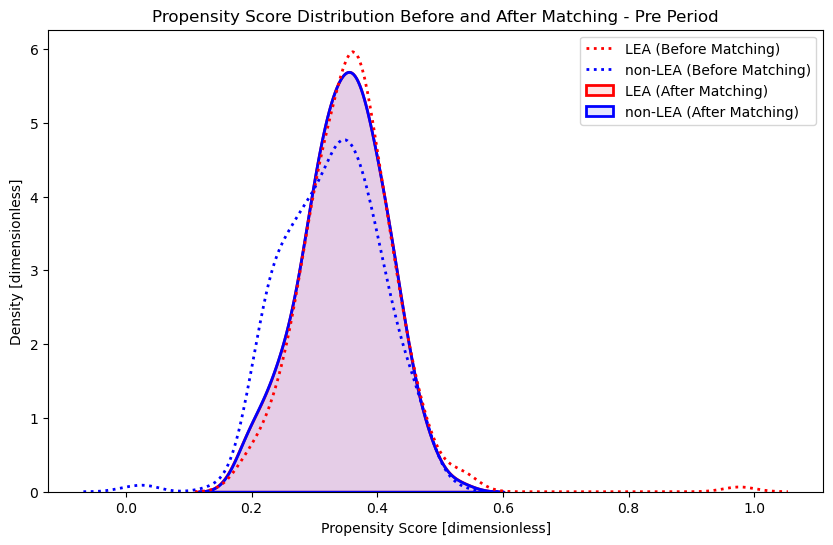

({'chi2_statistic': 68.63380843578862,
  'p_value': 1.1855411065424406e-16,
  'degrees_of_freedom': 1,
  'expected_freq': array([[335.97107438, 147.02892562],
         [169.02892562,  73.97107438]])},
 {'chi2_statistic': 26.04553805043701,
  'p_value': 3.3345859799377533e-07,
  'degrees_of_freedom': 1,
  'expected_freq': array([[126.5,  35.5],
         [126.5,  35.5]])})

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')
data['bmi'] = 10000*(data['weight'])/(data['height']*data['height'])
data['c/s'] = 1*(data['mode_section'])

# 前期データの選択と処理
pre_period_data = data[data['labor_date'] >= '2021-08-01']
X_pre = pre_period_data[['age', 'weight', 'bmi', 'weeks', 'smoke', 'P', 'fertility_ART']]
y_pre = pre_period_data['analgesia']

# ロジスティック回帰モデルを用いた傾向スコア計算
model_pre = LogisticRegression()
model_pre.fit(X_pre, y_pre)
pre_period_data['propensity_score'] = model_pre.predict_proba(X_pre)[:, 1]

# マッチング
treated_pre = pre_period_data[pre_period_data['analgesia'] == 1]
control_pre = pre_period_data[pre_period_data['analgesia'] == 0]
distances_pre = pairwise_distances(treated_pre[['propensity_score']], control_pre[['propensity_score']], metric='euclidean')
closest_pre = np.argmin(distances_pre, axis=1)

# ユニークなマッチングを確保
unique_closest_pre, indices_pre = np.unique(closest_pre, return_index=True)
matched_treated_pre = treated_pre.iloc[indices_pre]
matched_control_pre = control_pre.iloc[unique_closest_pre]

# マッチング前後のχ二乗検定
contingency_table_pre_before = pd.crosstab(pre_period_data['analgesia'], pre_period_data['c/s'])
chi2_pre_before, p_pre_before, dof_pre_before, expected_pre_before = chi2_contingency(contingency_table_pre_before)

matched_pre_data = pd.concat([matched_treated_pre, matched_control_pre])
contingency_table_pre_after = pd.crosstab(matched_pre_data['analgesia'], matched_pre_data['c/s'])
chi2_pre_after, p_pre_after, dof_pre_after, expected_pre_after = chi2_contingency(contingency_table_pre_after)

# 結果表示
results_pre_before = {
    'chi2_statistic': chi2_pre_before,
    'p_value': p_pre_before,
    'degrees_of_freedom': dof_pre_before,
    'expected_freq': expected_pre_before
}
results_pre_after = {
    'chi2_statistic': chi2_pre_after,
    'p_value': p_pre_after,
    'degrees_of_freedom': dof_pre_after,
    'expected_freq': expected_pre_after
}

# 可視化
plt.figure(figsize=(10, 6))
sns.kdeplot(treated_pre['propensity_score'], color='red', linestyle=':', linewidth=2, label='LEA (Before Matching)', shade=False)
sns.kdeplot(control_pre['propensity_score'], color='blue', linestyle=':', linewidth=2, label='non-LEA (Before Matching)', shade=False)
sns.kdeplot(matched_treated_pre['propensity_score'], color='red', linestyle='-', linewidth=2, label='LEA (After Matching)', shade=True, alpha=0.1)
sns.kdeplot(matched_control_pre['propensity_score'], color='blue', linestyle='-', linewidth=2, label='non-LEA (After Matching)', shade=True, alpha=0.1)
plt.title('Propensity Score Distribution Before and After Matching - Pre Period')
plt.xlabel('Propensity Score [dimensionless]')
plt.ylabel('Density [dimensionless]')
plt.legend()
plt.show()

results_pre_before, results_pre_after


In [2]:
from tableone import TableOne

# マッチング後のデータを結合
matched_data_pre = pd.concat([matched_treated_pre, matched_control_pre])
matched_data_pre['bmi'] = 10000*(matched_data_pre['weight'])/(matched_data_pre['height']*matched_data_pre['height'])
matched_data_pre['c/s'] = 1*(matched_data_pre['mode_section'])

# Define the columns to be included in the Table One
columns = ['age', 'height', 'weight', 'bmi', 'last_weight', 'weeks', 'days', 'G', 'P', 'c/s', 'fertility_AIH', 'fertility_ART', 
           'genital_cut', 'genital_tear', 'ph', 'apgar1', 'apgar5', 'baby_girth', 'baby_weight', 
           'pmh_gast', 'pmh_ortho', 'pmh_ent', 'pmh_brain', 'pmh_endo', 'pmh_opt', 'pmh_psych', 'pmh_resp', 'pmh_uro', 'pmh_infect', 'pmh_obgyn', 'pmh_allergy', 'pmh_cor', 'pmh_dent',
            'procedure_oxytocin', 'procedure_kristeller', 'procedure_memm', 'procedure_O2', 'procedure_minimetro', 'procedure_transfusion', 'procedure_baloon', 'procedure_pgf2'
           ]

# Define categorical variables
categorical = ['G', 'P', 'c/s', 'genital_cut', 'genital_tear', 'fertility_AIH', 'fertility_ART', 
              'pmh_gast', 'pmh_ortho', 'pmh_ent', 'pmh_brain', 'pmh_endo', 'pmh_opt', 'pmh_psych', 'pmh_resp', 'pmh_uro', 'pmh_infect', 'pmh_obgyn', 'pmh_allergy', 'pmh_cor', 'pmh_dent',
            'procedure_oxytocin', 'procedure_kristeller', 'procedure_memm', 'procedure_O2', 'procedure_minimetro', 'procedure_transfusion', 'procedure_baloon', 'procedure_pgf2'
            ]

# Define non-normal variables (using non-parametric tests for these)
nonnormal = ['age', 'height', 'weight', 'bmi', 'last_weight', 'weeks', 'days', 'ph', 'apgar1', 'apgar5']

# Groupby 変数（ここでは 'analgesia'）
groupby = 'analgesia'

# TableOne の生成
table1_pre = TableOne(data=matched_data_pre, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, pval=True, htest_name=True)

# 結果の表示
table1_pre
table1_pre.to_excel('ondemand_lea_table3.xlsx')


C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function mean at 0x000001635CF30540> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function median at 0x000001635D05F7E0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To kee